In [2]:
#Importing the libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing dataset
url="http://bit.ly/w-data"
data = pd.read_csv(url)

In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#Getting dimension
data.shape

(25, 2)

In [6]:
# Checking for Null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

From above we can observe that there is no null value in our dataset so there is no need of cleaning the data

Data Visualization

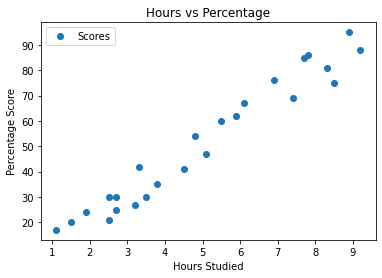

In [7]:
data.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied'. Lets plot a regression line to confirm the correlation.

The objective of Linear Regression is to find a line that minimizes the prediction error of all the data points.

Data Processing

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

Splitting the Dataset into Training Set and Test

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.20, random_state=0) 

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


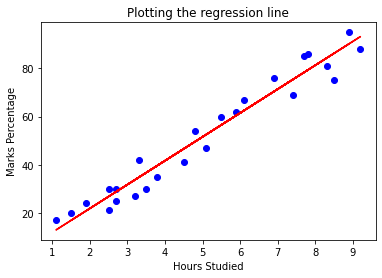

In [11]:
line = regressor.coef_*X + regressor.intercept_

plt.scatter(X, y,color="blue")
plt.plot(X, line,color='r');
plt.title('Plotting the regression line')
plt.ylabel('Marks Percentage')
plt.xlabel('Hours Studied')
plt.show()

Making Predictions

In [12]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing the Predicted Marks with the Actual Marks**

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


Predicting the score if an student studies for 9.25 hours a day.

In [15]:
# Testing the Model
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


According to the model created if a student studies for 9.25 hours a day he/she is likely to score 93.69

Evaluating the Model

In [16]:
from sklearn import metrics  
print('R2:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R2: 0.9454906892105354
Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


# The lower the value of Mean Absolute Eroor, better is the model's performance.
# The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.